# Step 1: Dataset Selection


### This dateset is from kaggle: https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset/discussion?select=retail_sales_dataset.csv
### The dataset consist of 1000 rows and 9 columns

### Each column in this dataset plays a pivotal role in unraveling the dynamics of retail operations and customer behavior.

### This data set shows information about a made-up retail situation, including things like transaction details, date, customer information, product category, and more. It helps us study sales trends, understand who's buying, and see what products are popular.



# Step 2: Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\HP\Desktop\data\retail_sales_dataset.csv")

In [3]:
dataset.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
dataset.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
dataset.shape

(1000, 9)

In [7]:
dataset['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [8]:
dataset['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [9]:
dataset['Age'].value_counts()

Age
43    31
64    31
57    30
51    30
34    28
54    28
22    27
62    27
42    26
47    26
46    25
23    24
40    24
50    23
27    23
52    22
60    22
30    22
26    22
31    22
35    22
28    21
41    21
18    21
55    21
20    21
19    21
21    20
25    20
49    19
56    19
32    19
38    19
61    18
39    18
48    18
63    17
45    17
59    17
53    17
29    16
37    16
36    15
44    15
24    15
58    14
33    10
Name: count, dtype: int64

In [10]:
dataset.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [11]:
dataset.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### Data Exploration Summary:

### 1. No missing values were identified.
### 2. Among the product categories, clothing emerged as the top-selling category.
### 3. Age distribution highlights 64 and 43 as the most frequently occurring ages.
### 4. Female customers outnumber male customers, with 510 occurrences compared to 490.

# Step 3: Visualization Creation

### Research Question: How does customer age and gender influence their purchasing behavior?

In [12]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86+']

In [13]:
dataset['Age Category'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels, right=False)

In [14]:
age_category_total = dataset.groupby('Age Category')['Total Amount'].sum()
age_category_average = dataset.groupby('Age Category')['Total Amount'].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_5352\389655654.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_total = dataset.groupby('Age Category')['Total Amount'].sum()
C:\Users\HP\AppData\Local\Temp\ipykernel_5352\389655654.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_average = dataset.groupby('Age Category')['Total Amount'].mean()


In [15]:
dataset.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Category
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,46-55
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,36-45
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,26-35


In [16]:
age_category_total

Age Category
18-25    74650
26-35    97090
36-45    96835
46-55    97235
56-65    90190
66-75        0
76-85        0
86+          0
Name: Total Amount, dtype: int64

In [17]:
age_category_average

Age Category
18-25    501.006711
26-35    478.275862
36-45    467.801932
46-55    432.155556
56-65    417.546296
66-75           NaN
76-85           NaN
86+             NaN
Name: Total Amount, dtype: float64

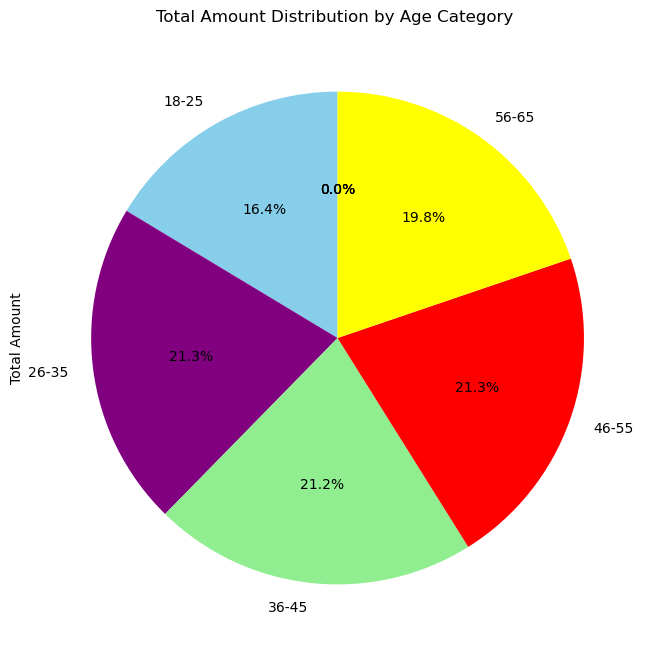

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))

age_category_total.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'purple', 'lightgreen', 'red', 'yellow'], ax=ax)

ax.set_title('Total Amount Distribution by Age Category ')
plt.show()

### Pie chart is used here to show the total amount distribution by age category

C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


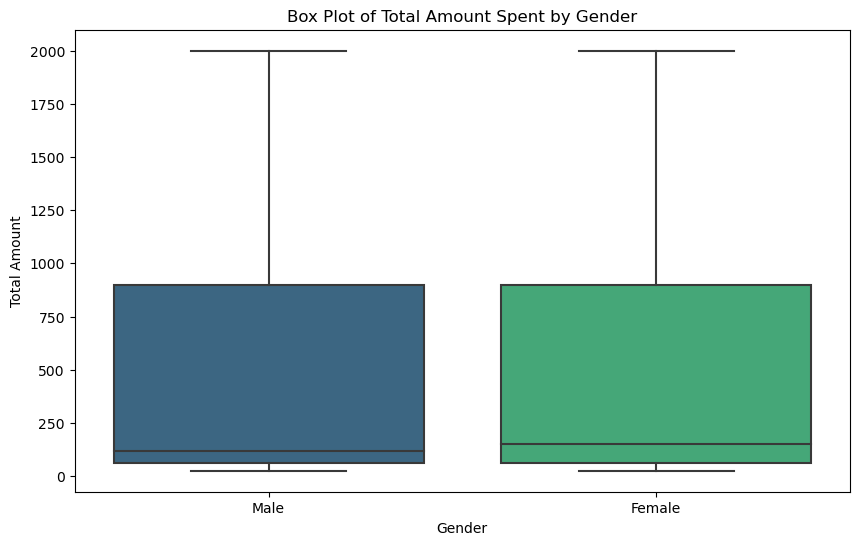

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Total Amount', data=dataset, palette='viridis')
plt.title('Box Plot of Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

### The above box plot gives an insight illustration on the average total amount for each gender category

### Box plot indicated that female average the higher number of amount spent by gender


C:\Users\HP\AppData\Local\Temp\ipykernel_5352\2348019226.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', hue='Age Category', data=dataset, ci=None)
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_

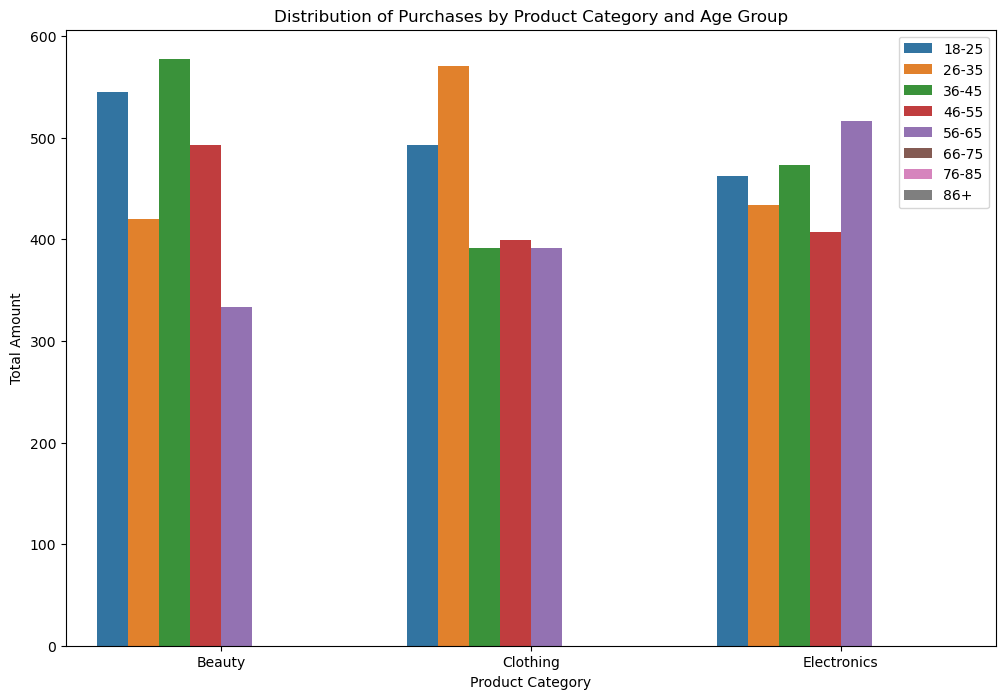

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Product Category', y='Total Amount', hue='Age Category', data=dataset, ci=None)
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.title('Distribution of Purchases by Product Category and Age Group')
plt.legend(loc= "upper right")

plt.show()

C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


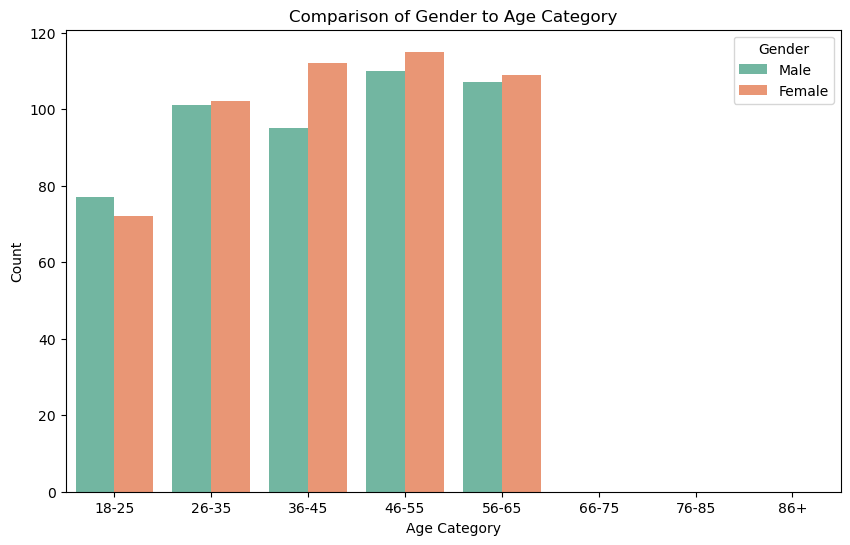

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Category', hue='Gender', data=dataset, palette='Set2')
plt.title('Comparison of Gender to Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')

plt.show()

### created a stacked bar chart comparing gender to age categories

C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

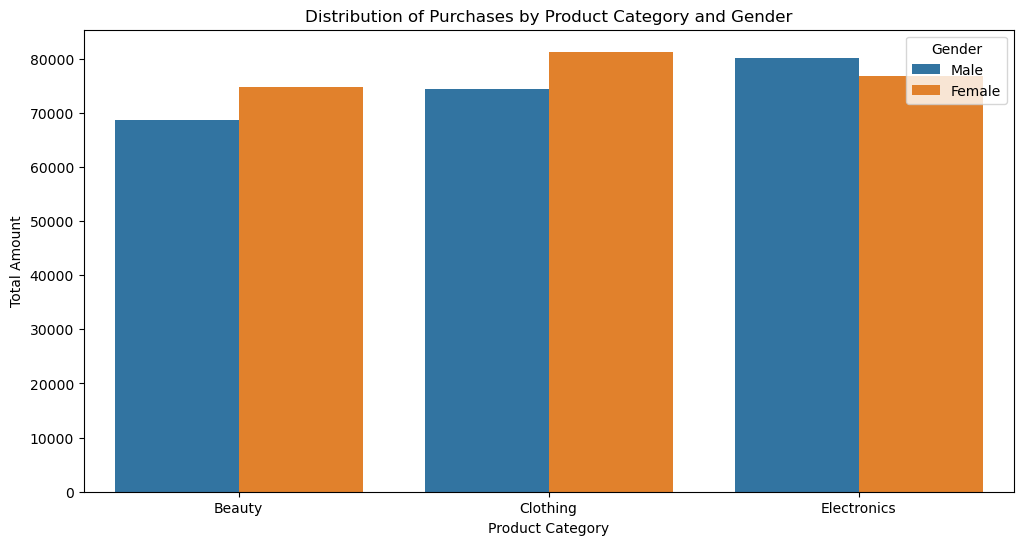

In [22]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(x="Product Category", y="Total Amount", data=dataset, hue="Gender", estimator=sum, errorbar=None)

plt.title("Distribution of Purchases by Product Category and Gender")

plt.legend(title="Gender", loc="upper right")

plt.show()

### The above bar plot visualize the distribution of purchases based on three factors: 'Product Category,' 'Age Category,' and 'Gender

C:\Users\HP\AppData\Local\Temp\ipykernel_5352\887423679.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = dataset.groupby(['Product Category', 'Age Category', 'Gender'])['Price per Unit'].mean().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_5352\887423679.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Category', y='Price per Unit', hue='Age Category', data=grouped_data, ci=None)
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\anac\lib\site-packages\seaborn\_oldcore.py:

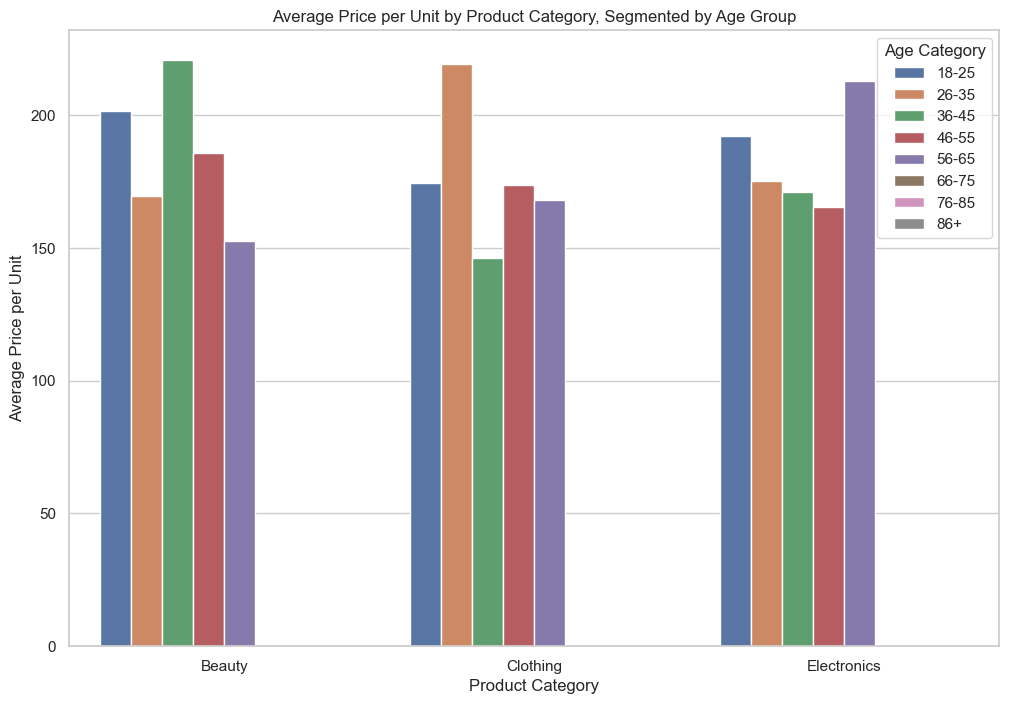

In [23]:
grouped_data = dataset.groupby(['Product Category', 'Age Category', 'Gender'])['Price per Unit'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='Product Category', y='Price per Unit', hue='Age Category', data=grouped_data, ci=None)

plt.title('Average Price per Unit by Product Category, Segmented by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Average Price per Unit')

plt.show()

### Create a bar chart to show the distribution of purchases in each product category, segmented by age group and gender.

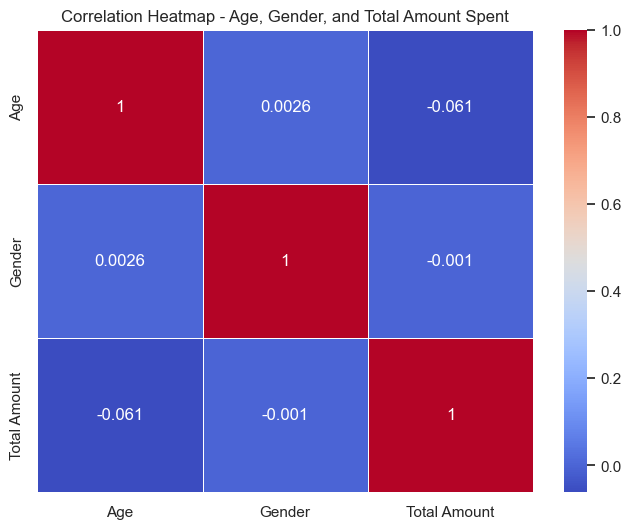

In [24]:
dataset['Gender'] = dataset['Gender'].astype('category').cat.codes
correlation_matrix = dataset[['Age', 'Gender', 'Total Amount']].corr()
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap - Age, Gender, and Total Amount Spent')

plt.show()

### The correlation heatmap shows as expected that:

### The diagonal is 1, which corresponds to the correlation of a number with itself
### The matrix is symmetric
### The features are not correlated since the values are all close to zero.